# 12.5.3 Clusering

## K-Means Clustering

The function `kmeans()` performs K-means clustering in `R`. We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift realtive to the next 25 observations.

In [1]:
set.seed(2)
x <- matrix(rnorm(50*2), ncol = 2)
x[1:25, 1] <- x[1:25, 1] + 3
x[1:25, 2] <- x[1:25, 2] - 4

We now perform K-means clustering with `K=2`.

In [2]:
km.out <- kmeans(x, 2, nstart = 20)

The cluster assignments of the 50 observations are contained in `km.out$cluster`.

In [3]:
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `kmeans()`. We can plot the data, with each observations colored according to its cluster assignment.

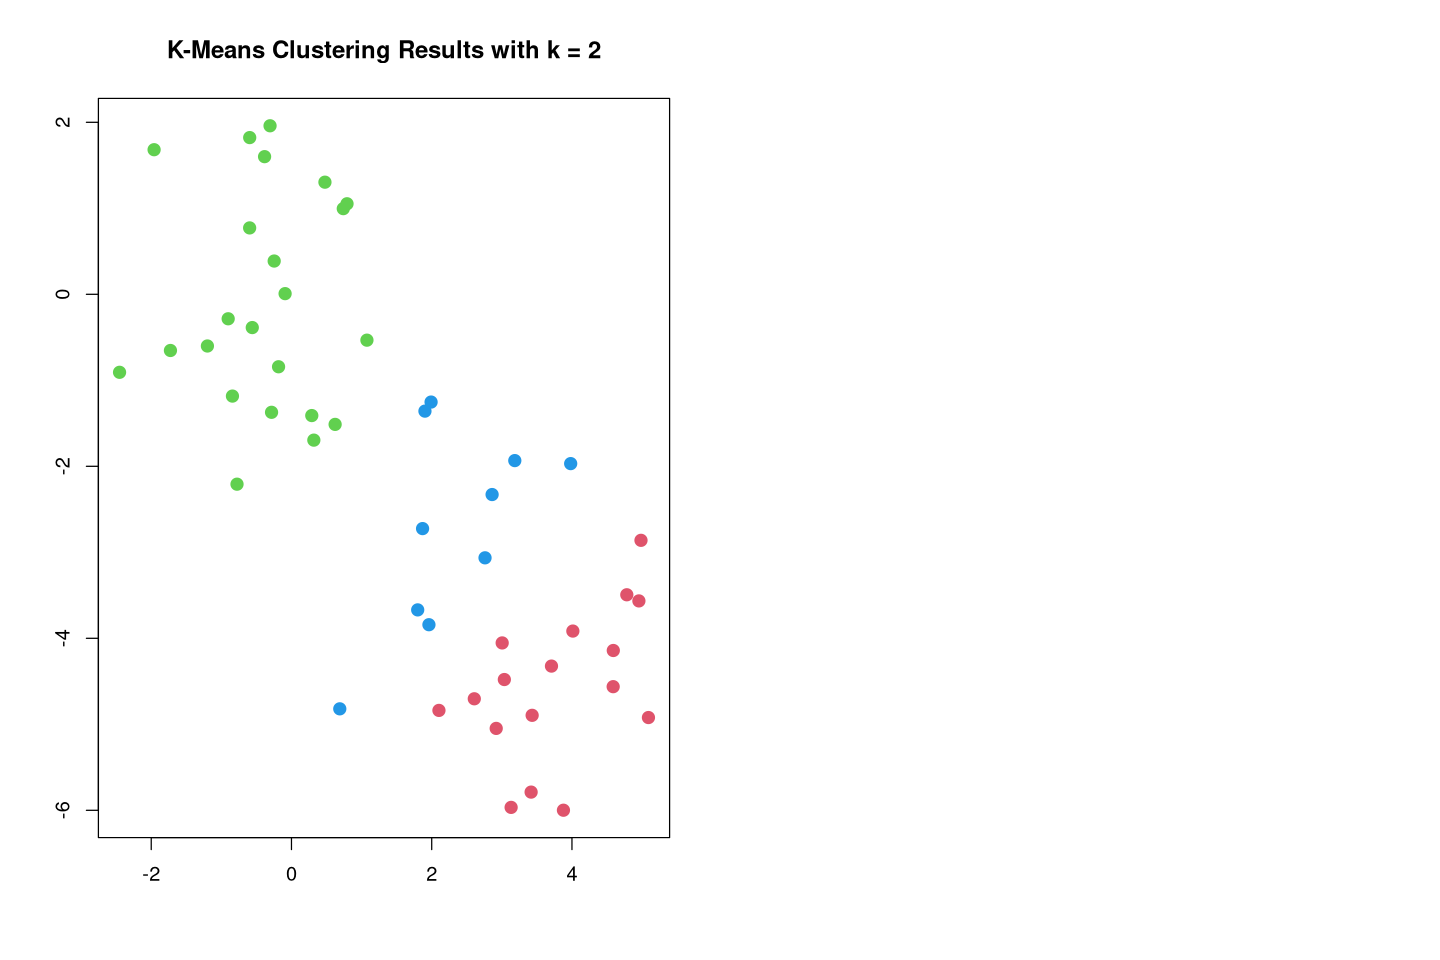

In [12]:
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(1, 2))
plot(x, col = (km.out$cluster + 1),
     main = "K-Means Clustering Results with k = 2",
     xlab = "", ylab = "", pch = 20, cex = 2)

Here the observations can be easily plotted because they are two-dimensional. If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters. We could instead have performed K-means clustering on this example with `K = 3`.

In [13]:
set.seed(4)
km.out <- kmeans(x, 3, nstart = 20)
km.out

K-means clustering with 3 clusters of sizes 17, 23, 10

Cluster means:
        [,1]        [,2]
1  3.7789567 -4.56200798
2 -0.3820397 -0.08740753
3  2.3001545 -2.69622023

Clustering vector:
 [1] 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 3 2 3 2 2 2 2

Within cluster sum of squares by cluster:
[1] 25.74089 52.67700 19.56137
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

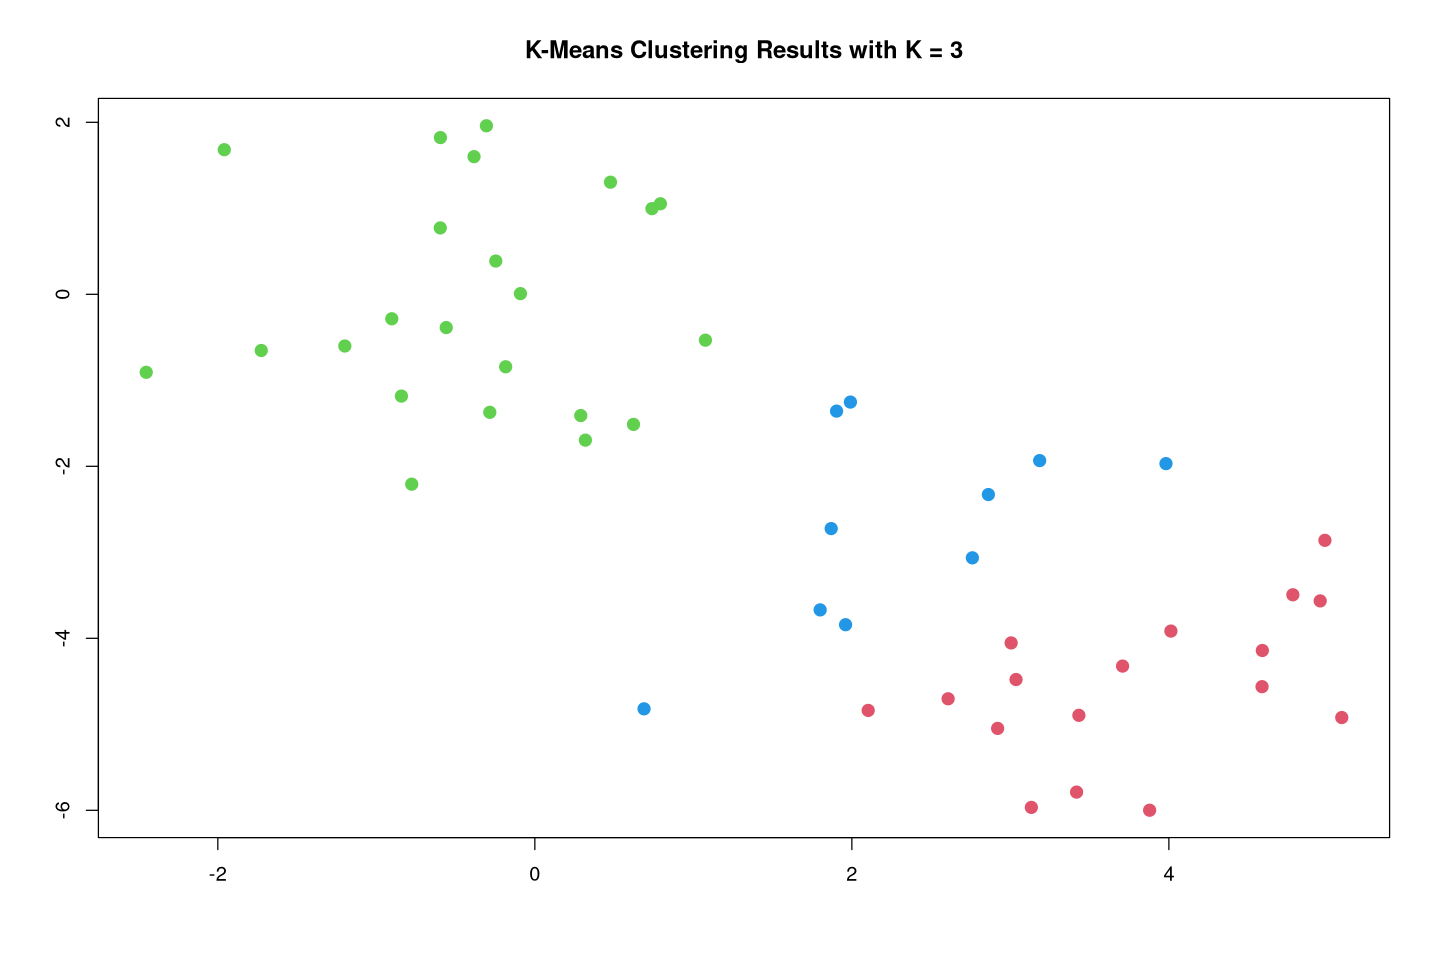

In [14]:
plot(x, col = (km.out$cluster + 1),
  main = "K-Means Clustering Results with K = 3",
  xlab = "", ylab = "", pch = 20, cex = 2)

When `K = 3`, K-means clustering splits up the two clusters.

To run the `kmeans()` function in `R` with multiple initial cluster assignments, we use the `nstart` argument. If a value of `nstart` greater than one is used, then K-means clustering will be performed using multiple random assignments in Step 1 of Algorithm 12.2, and the `kmeans()` function will report only the best results. Here we compare using `nstart = 1` to `nstart = 20`.

In [15]:
set.seed(4)
km.out <- kmeans(x, 3, nstart = 1)
km.out$tot.withinss

[1] 104.3319

In [17]:
km.out <- kmeans(x, 3, nstart = 20)
km.out$tot.withinss

[1] 97.97927

Note that `km.out$tot.withinss` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering (Equations 12.17). The individual within-cluster sum-of-squares are contained in the vector `km.out$withinss`.

We _strongly_ recommend always running K-means clustering with a large value of `nstart`, such as 20 or 50, since otherwise an undesirable local optimum may be obtained.

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to st a random seed using the `set.seed()` function. This way, the initial cluster assignments in Step 1 can be replicated, and the K-means output wil be fully reproducible.

## Hierarchical Clustering

The `hclust()` function implements hierarchical clustering in `R`. In the following example we use the data from the previous lab to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. We begin by clustering observations using complete linkage. The `dist()` function is used to compute the $50 \times 50$ inter-observation Euclidean distance matrix.

In [18]:
hc.complete <- hclust(dist(x), method = "complete")

We could just as easily perform hierarchical clustering with average or single linkage instead:

In [19]:
hc.average <- hclust(dist(x), method = "average")
hc.single <- hclust(dist(x), method = "single")

We can now plot the dendrograms obtained using the usual `plot()` function. The numbers at the bottom of the plot identify each observation.

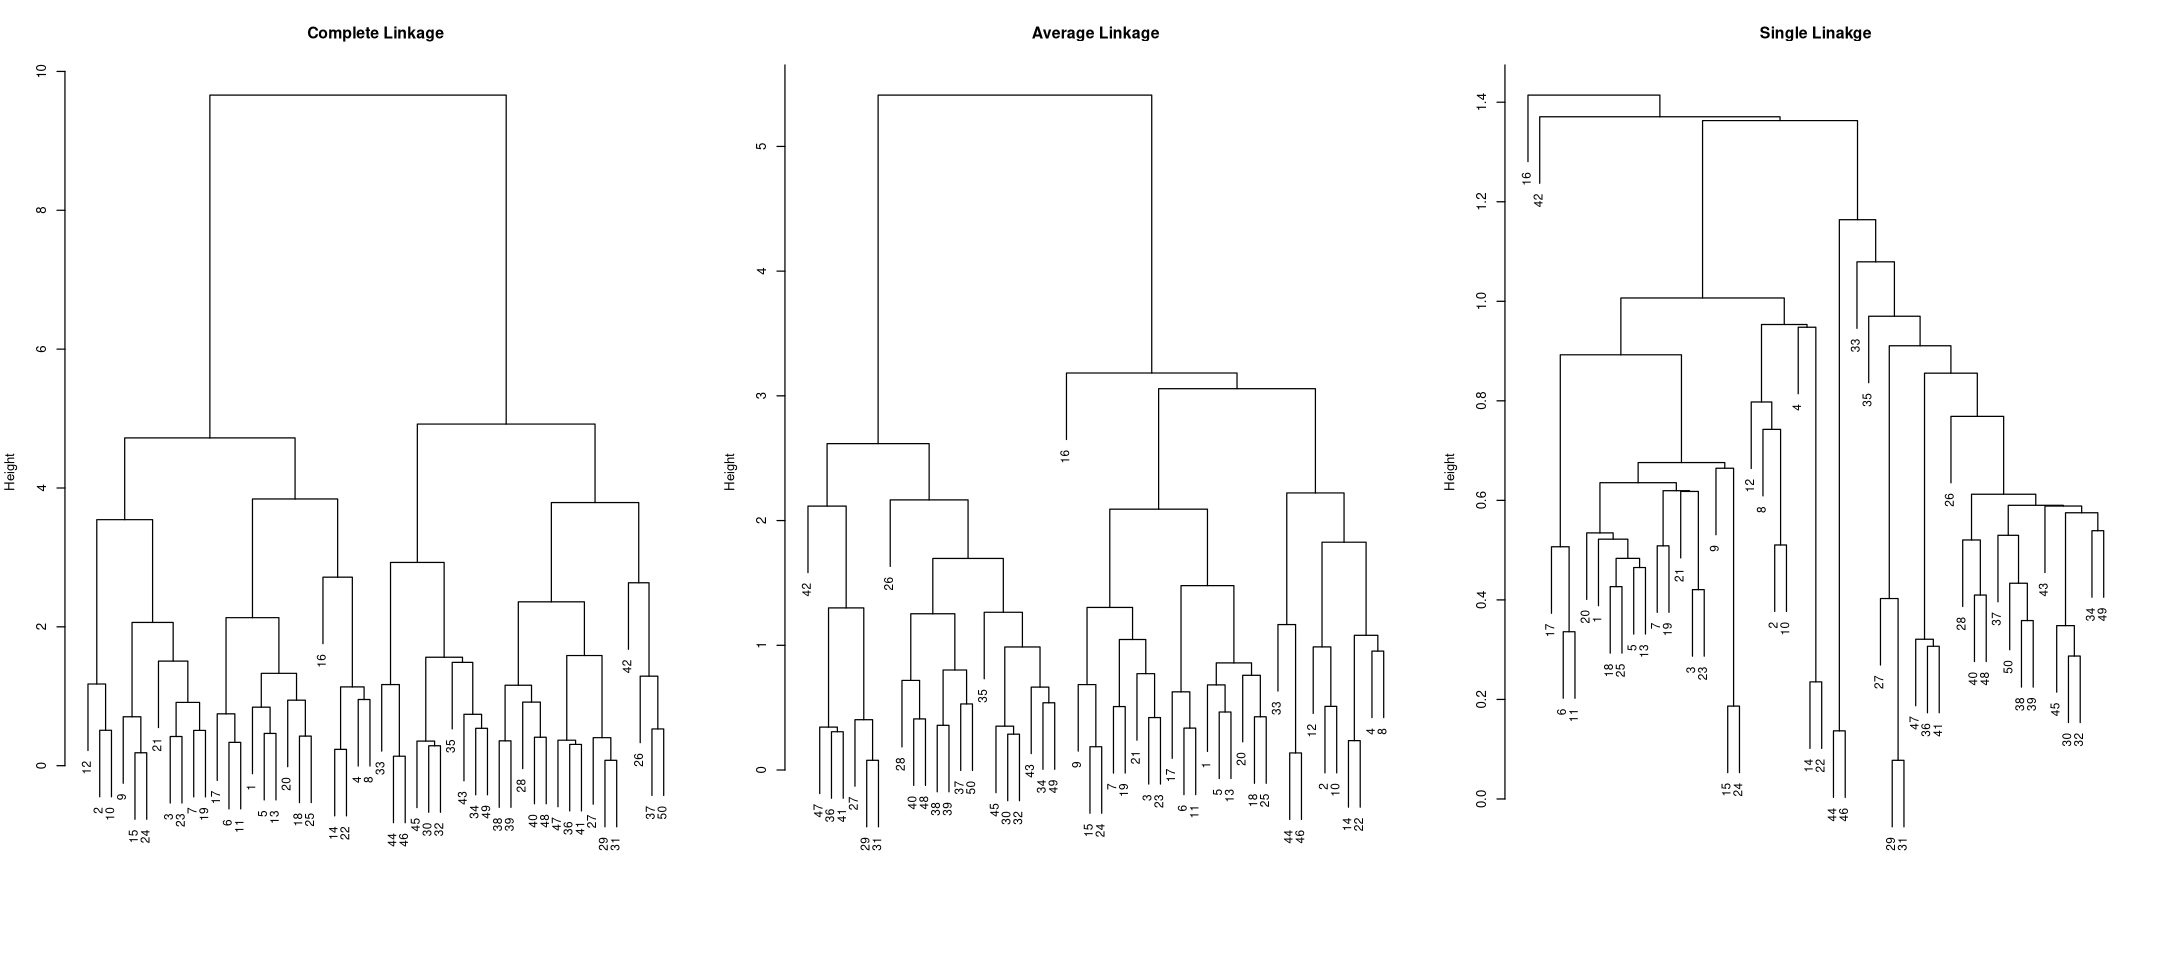

In [23]:
options(repr.plot.width = 18, repr.plot.height = 8)
par(mfrow = c(1, 3))
plot(hc.complete, main = "Complete Linkage",
     xlab = "", sub = "", cex = .9)
plot(hc.average, main = "Average Linkage",
     xlab = "", sub = "", cex = .9)
plot(hc.single, main = "Single Linakge",
     xlab = "", sub = "", cex = .9)

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the `cutree()` function:

In [24]:
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [25]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

In [26]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

The second argument to `cutree()` is the number of clusters we wish to obtain. For this data, complete and average linkage generally separate the observations into their correct groups. However, single linage identifies one point as belonging to its own cluster. A moe sensible answer is obtained when four clusters are selected, although there are still two singletons.

In [27]:
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

To scale the variables before performing hierarchical clustering of the observations, we use the `scale()` function:

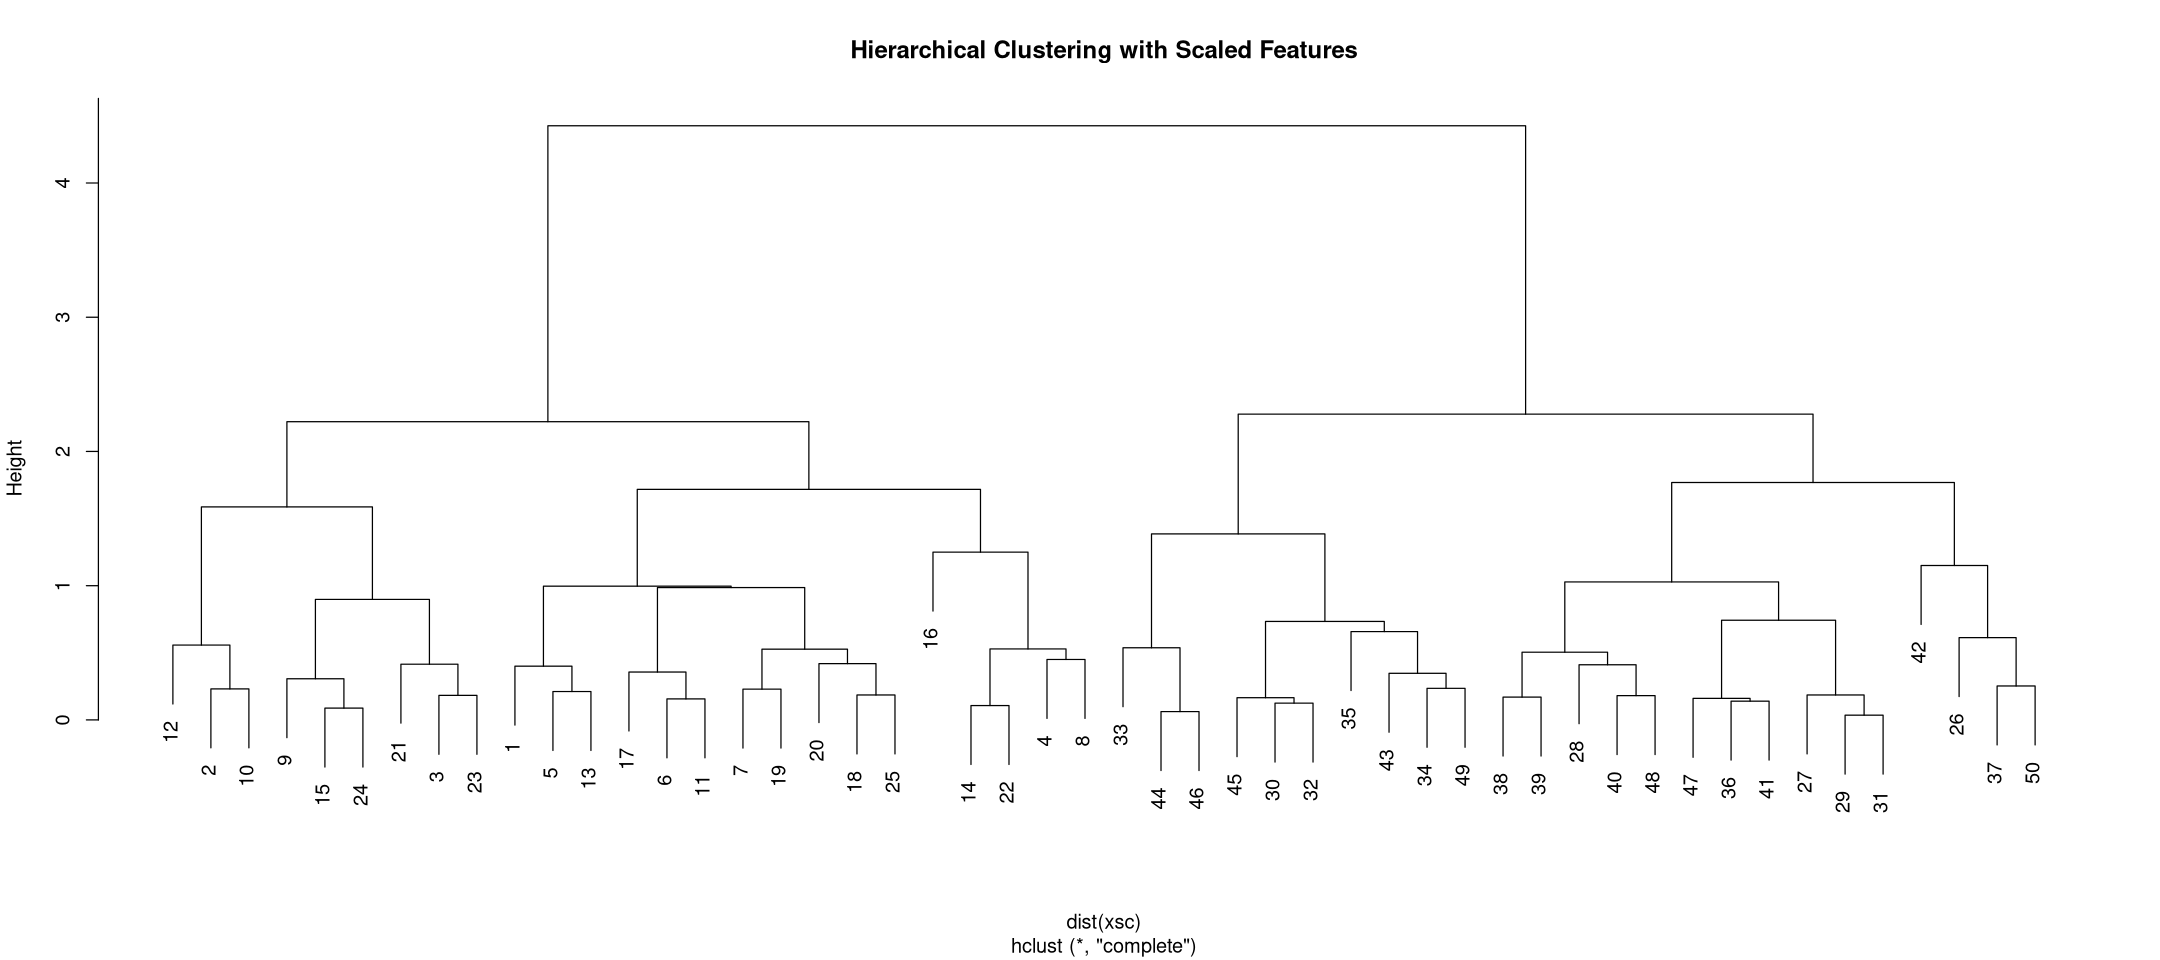

In [28]:
xsc <- scale(x)
plot(hclust(dist(xsc), method = "complete"),
     main = "Hierarchical Clustering with Scaled Features")

Correlation-based distance can be computed using the `as.dist()` function, which converts an arbirary square symmetric matrix into a form that the `hclust()` function recognizes as a distance matrix. However, this only makes sense for data with at least three features since the absolute correlation between any two observations with measurements on two features is always 1. Hence, we will cluster a three-dimensional data set. This data set does not contain any true clusters.

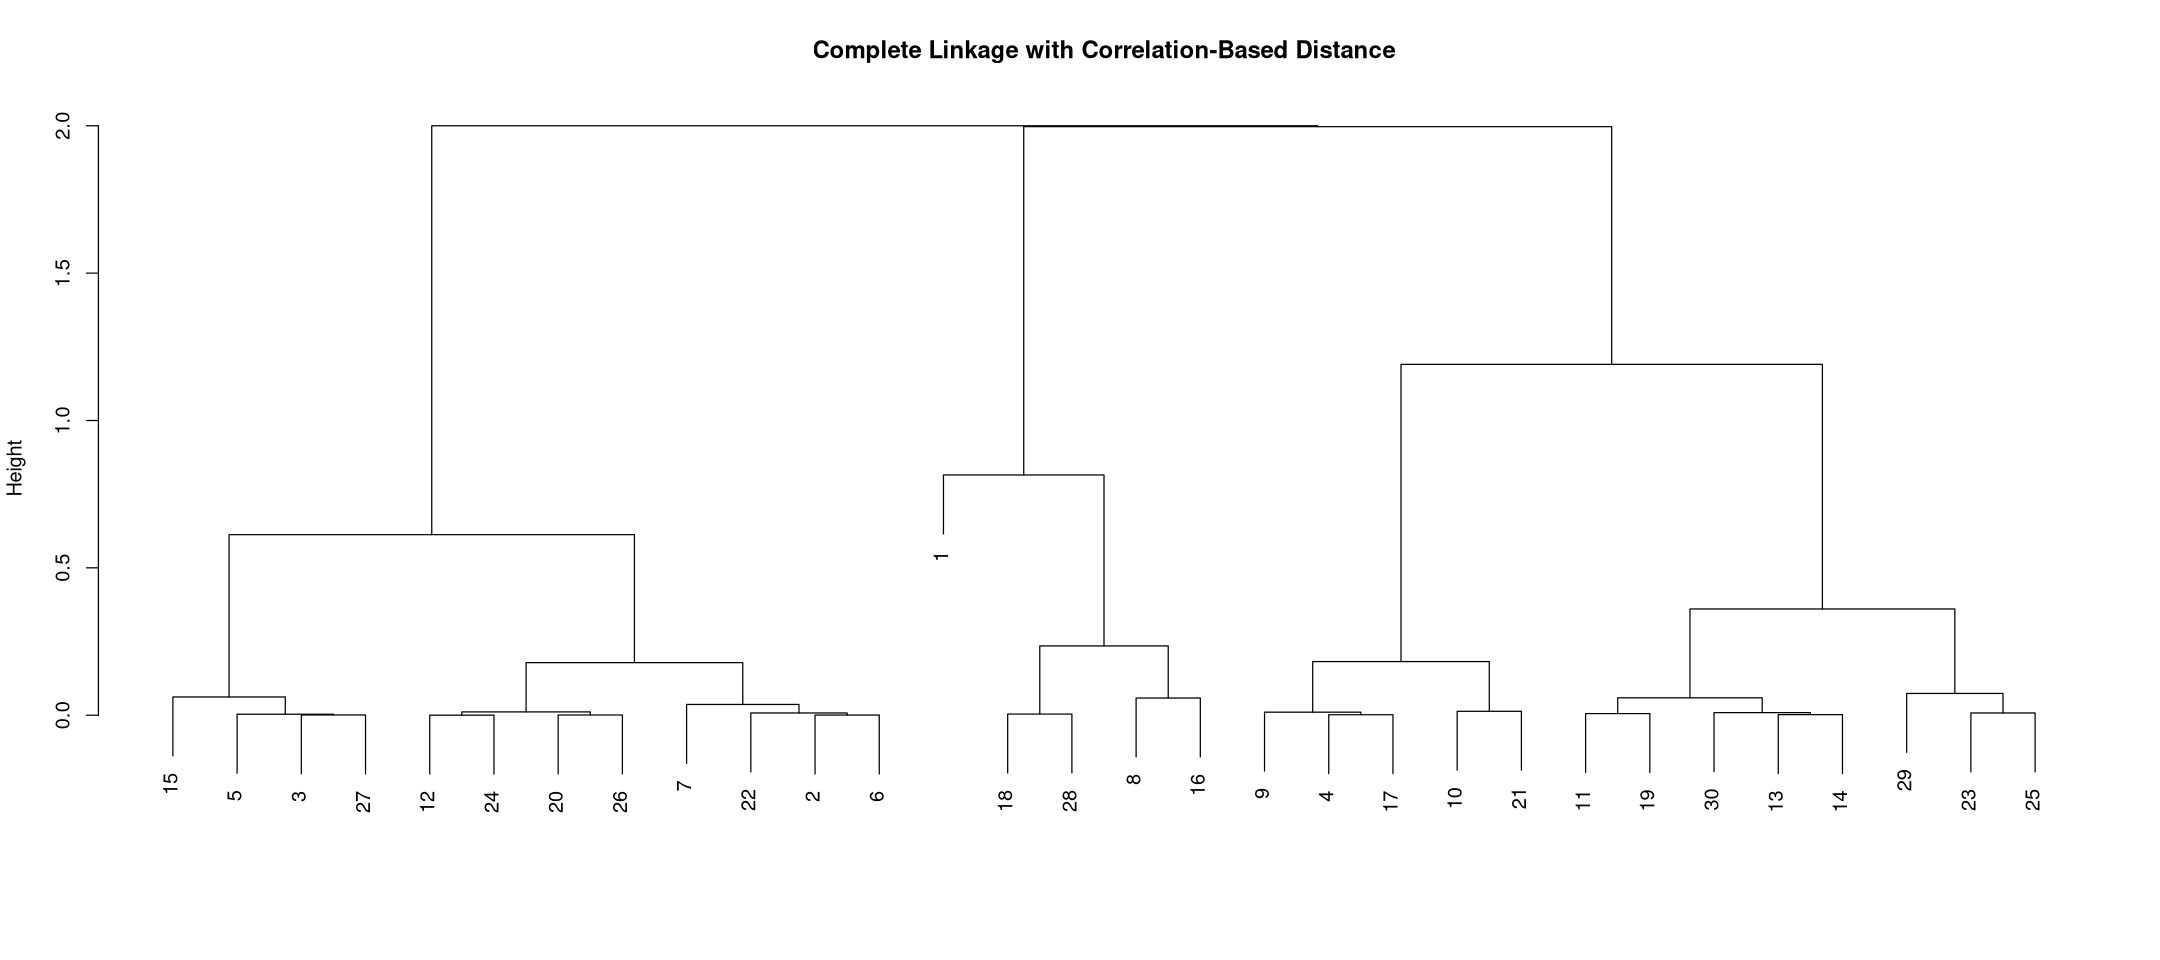

In [30]:
x <- matrix(rnorm(30 * 3), ncol = 3)
dd <- as.dist(1 - cor(t(x)))
plot(hclust(dd, method = "complete"),
     main = "Complete Linkage with Correlation-Based Distance",
     xlab = "", sub = "")